## Getting Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('DL_MT_Jul2020.xlsx', sheet_name='train', skiprows=1)
df.head()

,V_product1,V_product2,V_product3,V_product4,V_product5,V_product6,V_product7,Age_norm,Height_norm,Weight_norm,V_employment1,V_employment2,V_employment3,V_employment4,V_employment5,V_employment6,V_insured_person_1,V_insured_person_2,V_insured_person_3,V_insured_person_4,V_insured_person_5,V_insured_person_6,V_insured_person_7,V_insurance_hist1,V_insurance_hist2,V_insurance_hist3,V_insurance_hist4,V_insurance_hist5,V_insurance_hist6,V_insurance_hist7,V_insurance_hist8,V_hist_family1,V_hist_family2,V_hist_family3,V_hist_family4,V_hist_family5,V_med_hist1,V_med_hist2,V_med_hist3,V_med_hist4,...,V_med_drug4,V_med_drug5,V_med_drug6,V_med_drug7,V_med_drug8,V_med_drug9,V_med_drug10,V_med_drug11,V_med_drug12,V_med_drug13,V_med_drug14,V_med_drug15,V_med_drug16,V_med_drug17,V_med_drug18,V_med_drug19,V_med_drug20,V_med_drug21,V_med_drug22,V_med_drug23,V_med_drug24,V_med_drug25,V_med_drug26,V_med_drug27,V_med_drug28,V_med_drug29,V_med_drug30,V_med_drug31,V_med_drug32,V_med_drug33,V_med_drug34,V_med_drug35,V_med_drug36,V_med_drug37,V_med_drug38,V_med_drug39,V_med_drug40,V_med_drug41,BMI,Criticality_level
0,product1,D4,26,0.076923,cat2,V3,P1,0.164179,0.636364,0.267782,0.013,9,1,0.0,2,0.0800,1,2,2,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.449275,NaN,0.394366,NaN,NaN,162,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.508016,7
1,product1,D4,10,0.282051,cat2,V3,P1,0.268657,0.709091,0.205021,0.060,9,1,NaN,3,0.2200,1,2,4,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.391304,NaN,0.323944,NaN,6.0,335,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.321490,8
2,product1,D4,26,0.743590,cat2,V3,P3,0.164179,0.709091,0.246862,0.185,9,1,0.0,2,0.5000,1,2,3,3,1,1,1,2,1,3,2,0.000667,1,3,2,3,0.405797,NaN,0.394366,NaN,11.0,613,2,2,...,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.393349,8
3,product1,E1,26,0.282051,cat2,V3,P1,0.104478,0.709091,0.288703,0.020,9,1,0.0,2,0.0005,1,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,NaN,NaN,0.239437,NaN,NaN,162,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.465209,7
4,product1,D3,26,0.487179,cat2,V3,P3,0.343284,0.800000,0.280335,0.080,9,1,0.0,2,0.5000,1,2,3,3,1,1,1,2,3,3,1,0.001333,1,3,2,2,NaN,0.333333,0.507042,NaN,5.0,335,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0.367179,7


In [3]:
df.shape

(59381, 120)

In [4]:
df.isnull().sum().sort_values(ascending=False).head(15)

V_med_hist10         58824
V_med_hist32         58274
V_med_hist24         55580
V_med_hist15         44596
V_hist_family5       41811
V_hist_family3       34241
V_hist_family2       28656
V_insurance_hist5    25396
V_hist_family4       19184
V_employment6        10854
V_med_hist1           8889
V_employment4         6779
V_employment1           19
V_med_hist6              0
V_med_hist21             0
dtype: int64

There are missing values available in the dataset. Missing values available in the employment related variables needs to be imputed but missing values in the other variables are legit.

Impute in:

V_employment1, V_employment4, V_employment6


In [ ]:
df[49381:].shape

(10000, 120)

In [ ]:
df[:49381].shape

(49381, 120)

In [5]:
train = df[:49381]
valid = df[49381:]

In [ ]:
train.tail()

,V_product1,V_product2,V_product3,V_product4,V_product5,V_product6,V_product7,Age_norm,Height_norm,Weight_norm,V_employment1,V_employment2,V_employment3,V_employment4,V_employment5,V_employment6,V_insured_person_1,V_insured_person_2,V_insured_person_3,V_insured_person_4,V_insured_person_5,V_insured_person_6,V_insured_person_7,V_insurance_hist1,V_insurance_hist2,V_insurance_hist3,V_insurance_hist4,V_insurance_hist5,V_insurance_hist6,V_insurance_hist7,V_insurance_hist8,V_hist_family1,V_hist_family2,V_hist_family3,V_hist_family4,V_hist_family5,V_med_hist1,V_med_hist2,V_med_hist3,V_med_hist4,...,V_med_drug4,V_med_drug5,V_med_drug6,V_med_drug7,V_med_drug8,V_med_drug9,V_med_drug10,V_med_drug11,V_med_drug12,V_med_drug13,V_med_drug14,V_med_drug15,V_med_drug16,V_med_drug17,V_med_drug18,V_med_drug19,V_med_drug20,V_med_drug21,V_med_drug22,V_med_drug23,V_med_drug24,V_med_drug25,V_med_drug26,V_med_drug27,V_med_drug28,V_med_drug29,V_med_drug30,V_med_drug31,V_med_drug32,V_med_drug33,V_med_drug34,V_med_drug35,V_med_drug36,V_med_drug37,V_med_drug38,V_med_drug39,V_med_drug40,V_med_drug41,BMI,Criticality_level
49376,product1,A1,31,0.076923,cat2,V3,P1,0.014925,0.636364,0.154812,0.008443,9,1,0.00,3,NaN,1,2,3,3,1,2,1,2,1,3,1,0.000267,1,3,2,3,0.188406,NaN,0.140845,NaN,2.0,303,2,2,...,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0.288985,8
49377,product1,D3,26,0.282051,cat2,V3,P1,0.641791,0.745455,0.330544,0.140000,9,1,0.02,2,1.0,1,2,3,3,1,1,1,2,1,3,1,0.003333,1,3,2,2,0.681159,NaN,NaN,0.321429,6.0,161,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0.496592,6
49378,product1,D2,26,0.230769,cat2,V3,P1,0.552239,0.763636,0.393305,0.030000,9,1,0.00,2,0.0,2,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,NaN,0.656863,NaN,0.419643,1.0,491,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.576497,5
49379,product1,E1,26,0.076923,cat2,V3,P1,0.582090,0.927273,0.529289,0.100000,2,1,0.00,2,0.5,1,2,3,3,1,1,1,2,1,3,1,0.000333,1,3,2,3,NaN,0.617647,NaN,0.633929,4.0,418,3,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.584271,2
49380,product1,A8,26,0.076923,cat2,V3,P1,0.582090,0.709091,0.278243,0.074000,9,1,0.00,2,NaN,1,2,8,2,1,2,1,2,1,3,1,0.000200,1,3,2,2,NaN,0.431373,NaN,0.526786,6.0,528,3,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.447244,8


In [ ]:
valid.head()

,V_product1,V_product2,V_product3,V_product4,V_product5,V_product6,V_product7,Age_norm,Height_norm,Weight_norm,V_employment1,V_employment2,V_employment3,V_employment4,V_employment5,V_employment6,V_insured_person_1,V_insured_person_2,V_insured_person_3,V_insured_person_4,V_insured_person_5,V_insured_person_6,V_insured_person_7,V_insurance_hist1,V_insurance_hist2,V_insurance_hist3,V_insurance_hist4,V_insurance_hist5,V_insurance_hist6,V_insurance_hist7,V_insurance_hist8,V_hist_family1,V_hist_family2,V_hist_family3,V_hist_family4,V_hist_family5,V_med_hist1,V_med_hist2,V_med_hist3,V_med_hist4,...,V_med_drug4,V_med_drug5,V_med_drug6,V_med_drug7,V_med_drug8,V_med_drug9,V_med_drug10,V_med_drug11,V_med_drug12,V_med_drug13,V_med_drug14,V_med_drug15,V_med_drug16,V_med_drug17,V_med_drug18,V_med_drug19,V_med_drug20,V_med_drug21,V_med_drug22,V_med_drug23,V_med_drug24,V_med_drug25,V_med_drug26,V_med_drug27,V_med_drug28,V_med_drug29,V_med_drug30,V_med_drug31,V_med_drug32,V_med_drug33,V_med_drug34,V_med_drug35,V_med_drug36,V_med_drug37,V_med_drug38,V_med_drug39,V_med_drug40,V_med_drug41,BMI,Criticality_level
49381,product1,D3,26,0.076923,cat2,V3,P1,0.537313,0.563636,0.278243,0.015,12,1,NaN,2,0.006,2,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,NaN,0.450980,0.549296,NaN,NaN,162,2,2,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.626094,1
49382,product1,A6,26,0.487179,cat2,V3,P1,0.134328,0.854545,0.435146,0.140,14,1,0.0,2,0.200,1,2,2,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.289855,NaN,0.253521,NaN,7.0,145,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.537566,7
49383,product1,A5,26,1.000000,cat2,V3,P1,0.208955,0.672727,0.276151,0.100,9,1,0.0,2,0.150,2,2,3,3,1,2,1,2,1,1,3,NaN,3,2,3,2,NaN,0.392157,0.436620,NaN,18.0,335,2,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.482114,7
49384,product1,A8,26,0.282051,cat2,V3,P1,0.522388,0.709091,0.242678,0.061,14,1,0.0,2,0.640,1,2,8,3,1,1,1,2,1,3,2,0.000667,1,3,2,3,NaN,0.549020,0.549296,NaN,9.0,613,3,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.386163,8
49385,product1,D2,26,0.179487,cat2,V3,P1,0.522388,0.600000,0.188285,0.050,9,1,NaN,2,0.200,1,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.637681,NaN,NaN,0.526786,0.0,491,2,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.388982,4


## EDA

In [ ]:
train.isnull().sum().sort_values(ascending=False).head(15)

V_med_hist10         48910
V_med_hist32         48454
V_med_hist24         46231
V_med_hist15         37145
V_hist_family5       34783
V_hist_family3       28545
V_hist_family2       23755
V_insurance_hist5    21164
V_hist_family4       15918
V_employment6         9064
V_med_hist1           7380
V_employment4         5687
V_employment1           15
V_med_hist6              0
V_med_hist21             0
dtype: int64

In [ ]:
valid.isnull().sum().sort_values(ascending=False).head(15)

V_med_hist10         9914
V_med_hist32         9820
V_med_hist24         9349
V_med_hist15         7451
V_hist_family5       7028
V_hist_family3       5696
V_hist_family2       4901
V_insurance_hist5    4232
V_hist_family4       3266
V_employment6        1790
V_med_hist1          1509
V_employment4        1092
V_employment1           4
V_med_hist6             0
V_med_hist21            0
dtype: int64

In [ ]:
train[['V_med_hist10','V_med_hist32','V_med_hist24','V_med_hist15','V_med_hist1']].describe()

,V_med_hist10,V_med_hist32,V_med_hist24,V_med_hist15,V_med_hist1
count,471.000000,927.000000,3150.000000,12236.000000,42001.000000
mean,140.774947,11.840345,50.444762,123.045603,7.962572
std,107.326110,38.993691,77.693979,98.597310,13.122690
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,0.000000,1.000000,17.000000,2.000000
50%,225.000000,0.000000,8.000000,115.000000,4.000000
75%,240.000000,2.000000,63.000000,240.000000,9.000000
max,240.000000,240.000000,240.000000,240.000000,240.000000


In [ ]:
train[['V_employment1','V_employment4','V_employment6']].describe()

,V_employment1,V_employment4,V_employment6
count,49366.000000,43694.000000,40317.000000
mean,0.077625,0.006315,0.361351
std,0.082863,0.033120,0.350037
min,0.000000,0.000000,0.000000
25%,0.035000,0.000000,0.060000
50%,0.060000,0.000000,0.250000
75%,0.099767,0.000000,0.550000
max,1.000000,1.000000,1.000000


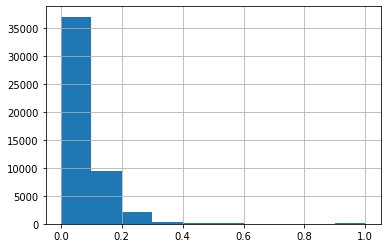

In [ ]:
train['V_employment1'].hist()

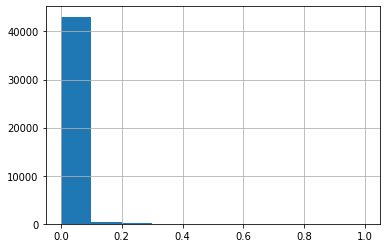

In [ ]:
train['V_employment4'].hist()

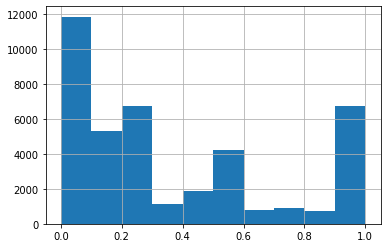

In [ ]:
train['V_employment6'].hist()

In [ ]:
train['Criticality_level'].value_counts()

8    16096
6     9360
7     6674
2     5448
1     5166
5     4582
4     1203
3      852
Name: Criticality_level, dtype: int64

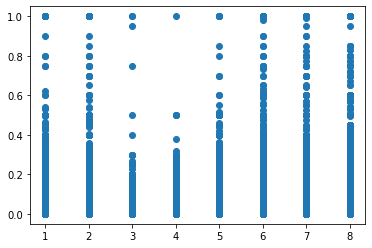

In [ ]:
plt.scatter(train['Criticality_level'], train['V_employment1'])

In [6]:
train['V_employment1'].fillna(train['V_employment1'].median(), inplace=True)
train['V_employment4'].fillna(train['V_employment4'].median(), inplace=True)
train['V_employment6'].fillna(train['V_employment6'].median(), inplace=True)

In [ ]:
train.isnull().sum().sort_values(ascending=False).head(10)

V_med_hist10         48910
V_med_hist32         48454
V_med_hist24         46231
V_med_hist15         37145
V_hist_family5       34783
V_hist_family3       28545
V_hist_family2       23755
V_insurance_hist5    21164
V_hist_family4       15918
V_med_hist1           7380
dtype: int64

In [7]:
train = train.fillna(0)

In [7]:
train.isnull().values.any()

False

In [ ]:
train.dtypes.head(50)

V_product1             object
V_product2             object
V_product3              int64
V_product4            float64
V_product5             object
V_product6             object
V_product7             object
Age_norm              float64
Height_norm           float64
Weight_norm           float64
V_employment1         float64
V_employment2           int64
V_employment3           int64
V_employment4         float64
V_employment5           int64
V_employment6         float64
V_insured_person_1      int64
V_insured_person_2      int64
V_insured_person_3      int64
V_insured_person_4      int64
V_insured_person_5      int64
V_insured_person_6      int64
V_insured_person_7      int64
V_insurance_hist1       int64
V_insurance_hist2       int64
V_insurance_hist3       int64
V_insurance_hist4       int64
V_insurance_hist5     float64
V_insurance_hist6       int64
V_insurance_hist7       int64
V_insurance_hist8       int64
V_hist_family1          int64
V_hist_family2        float64
V_hist_fam

In [6]:
train.dtypes.tail(50)

V_med_hist35           int64
V_med_hist36           int64
V_med_hist37           int64
V_med_hist38           int64
V_med_hist39           int64
V_med_hist40           int64
V_med_hist41           int64
V_med_drug1            int64
V_med_drug2            int64
V_med_drug3            int64
V_med_drug4            int64
V_med_drug5            int64
V_med_drug6            int64
V_med_drug7            int64
V_med_drug8            int64
V_med_drug9            int64
V_med_drug10           int64
V_med_drug11           int64
V_med_drug12           int64
V_med_drug13           int64
V_med_drug14           int64
V_med_drug15           int64
V_med_drug16           int64
V_med_drug17           int64
V_med_drug18           int64
V_med_drug19           int64
V_med_drug20           int64
V_med_drug21           int64
V_med_drug22           int64
V_med_drug23           int64
V_med_drug24           int64
V_med_drug25           int64
V_med_drug26           int64
V_med_drug27           int64
V_med_drug28  

In [8]:
cat_cols = ['V_product1', 'V_product2', 'V_product5', 'V_product6', 'V_product7', 'Criticality_level']

In [8]:
train[cat_cols].head()

,V_product1,V_product2,V_product5,V_product6,V_product7,Criticality_level
0,product1,D4,cat2,V3,P1,7
1,product1,D4,cat2,V3,P1,8
2,product1,D4,cat2,V3,P3,8
3,product1,E1,cat2,V3,P1,7
4,product1,D3,cat2,V3,P3,7


In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    train[col] = le.fit_transform(train[col])

In [10]:
train[cat_cols].head()

,V_product1,V_product2,V_product5,V_product6,V_product7,Criticality_level
0,0,17,0,1,0,6
1,0,17,0,1,0,7
2,0,17,0,1,2,7
3,0,18,0,1,0,6
4,0,16,0,1,2,6


In [11]:
train.dtypes.head(5)

V_product1      int64
V_product2      int64
V_product3      int64
V_product4    float64
V_product5      int64
dtype: object

In [12]:
train['Criticality_level'].value_counts()

7    16096
5     9360
6     6674
1     5448
0     5166
4     4582
3     1203
2      852
Name: Criticality_level, dtype: int64

In [10]:
X_train = train.drop(['Criticality_level'], axis=1)
y_train = train['Criticality_level']

In [11]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler(feature_range = (0, 1)).fit(X_train)
X_train_norm = norm.transform(X_train)

In [ ]:
X_train_norm[0]

array([0.        , 0.94444444, 0.69444444, 0.07692308, 0.        ,
       1.        , 0.        , 0.1641791 , 0.63636364, 0.26778243,
       0.013     , 0.21621622, 0.        , 0.        , 0.        ,
       0.08      , 0.        , 0.        , 0.1       , 1.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 0.5       ,
       1.        , 1.        , 0.44927536, 0.        , 0.42424242,
       0.        , 0.        , 0.2488408 , 0.5       , 1.        ,
       0.        , 1.        , 0.5       , 0.5       , 0.5       ,
       0.        , 1.        , 0.5       , 1.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.5       , 0.        , 1.        , 1.        , 0.        ,
       0.        , 1.        , 1.        , 0.        , 1.        ,
       0.5       , 1.        , 0.        , 1.        , 1.        ,
       0.        , 0.5       , 0.5       , 0.        , 1.     

## Handling Test Data

In [12]:
valid['V_employment1'].fillna(valid['V_employment1'].median(), inplace=True)
valid['V_employment4'].fillna(valid['V_employment4'].median(), inplace=True)
valid['V_employment6'].fillna(valid['V_employment6'].median(), inplace=True)

In [ ]:
valid.isnull().sum().sort_values(ascending=False).head(10)

V_med_hist10         9914
V_med_hist32         9820
V_med_hist24         9349
V_med_hist15         7451
V_hist_family5       7028
V_hist_family3       5696
V_hist_family2       4901
V_insurance_hist5    4232
V_hist_family4       3266
V_med_hist1          1509
dtype: int64

In [13]:
valid = valid.fillna(0)

In [ ]:
valid.isnull().values.any()

False

In [14]:
cat_cols = ['V_product1', 'V_product2', 'V_product5', 'V_product6', 'V_product7', 'Criticality_level']

In [18]:
valid[cat_cols].head()

,V_product1,V_product2,V_product5,V_product6,V_product7,Criticality_level
49381,product1,D3,cat2,V3,P1,1
49382,product1,A6,cat2,V3,P1,7
49383,product1,A5,cat2,V3,P1,7
49384,product1,A8,cat2,V3,P1,8
49385,product1,D2,cat2,V3,P1,4


In [15]:
for col in cat_cols:
    valid[col] = le.fit_transform(valid[col])

In [20]:
valid['Criticality_level'].value_counts()

7    3393
5    1873
6    1353
1    1104
0    1041
4     850
3     225
2     161
Name: Criticality_level, dtype: int64

In [16]:
X_test = valid.drop(['Criticality_level'], axis=1)
y_test = valid['Criticality_level']

In [17]:
X_test_norm = norm.transform(X_test)

In [23]:
X_train.shape, y_train.shape

((49381, 119), (49381,))

In [24]:
X_test.shape, y_test.shape

((10000, 119), (10000,))

## Model Building

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [19]:
num_classes = 8

In [20]:
model = Sequential([
    layers.Dense(64, input_shape=[119]),
    layers.Dense(128),
    layers.Dense(num_classes, activation='softmax')
])

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                7680      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 1032      
Total params: 17,032
Trainable params: 17,032
Non-trainable params: 0
_________________________________________________________________


In [22]:
optimizer   = tf.keras.optimizers.RMSprop(learning_rate=1e-4)
loss        = tf.keras.losses.SparseCategoricalCrossentropy()
metrics     = ['accuracy']

In [23]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [24]:
epochs = 300

In [25]:
history = model.fit(X_train,
                    y_train,
                    epochs = epochs,
                    verbose = 1,
                    batch_size=100,
                    validation_data = (X_test, y_test))

Epoch 1/300
494/494 [==============================] - 2s 3ms/step - loss: 5.5296 - accuracy: 0.2407 - val_loss: 2.2896 - val_accuracy: 0.2073
Epoch 2/300
494/494 [==============================] - 1s 2ms/step - loss: 2.1537 - accuracy: 0.2870 - val_loss: 1.8590 - val_accuracy: 0.3194
Epoch 3/300
494/494 [==============================] - 1s 2ms/step - loss: 2.0347 - accuracy: 0.3092 - val_loss: 1.8143 - val_accuracy: 0.3689
Epoch 4/300
494/494 [==============================] - 1s 2ms/step - loss: 1.9819 - accuracy: 0.3225 - val_loss: 1.7745 - val_accuracy: 0.3829
Epoch 5/300
494/494 [==============================] - 1s 2ms/step - loss: 1.9441 - accuracy: 0.3306 - val_loss: 1.9961 - val_accuracy: 0.3809
Epoch 6/300
494/494 [==============================] - 1s 2ms/step - loss: 1.9077 - accuracy: 0.3435 - val_loss: 1.8470 - val_accuracy: 0.3836
Epoch 7/300
494/494 [==============================] - 1s 2ms/step - loss: 1.8900 - accuracy: 0.3459 - val_loss: 1.6913 - val_accuracy: 0.3752

<Figure size 432x288 with 0 Axes>

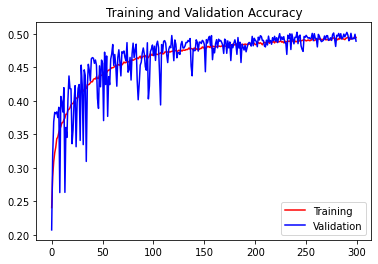

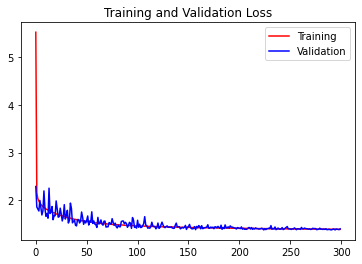

<Figure size 432x288 with 0 Axes>

In [26]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()

In [28]:
_, train_acc = model.evaluate(X_train, y_train)
_, test_acc = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3995 - accuracy: 0.4893


In [29]:
y_pred = model.predict(X_test).argmax(axis=-1)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.30      0.32      0.31      1041
           1       0.34      0.24      0.28      1104
           2       0.37      0.06      0.11       161
           3       0.35      0.44      0.39       225
           4       0.35      0.18      0.24       850
           5       0.40      0.32      0.35      1873
           6       0.38      0.29      0.33      1353
           7       0.63      0.90      0.74      3393

    accuracy                           0.49     10000
   macro avg       0.39      0.34      0.34     10000
weighted avg       0.45      0.49      0.46     10000



In [34]:
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm)

Text(0.5, 15.0, 'Predicted label')

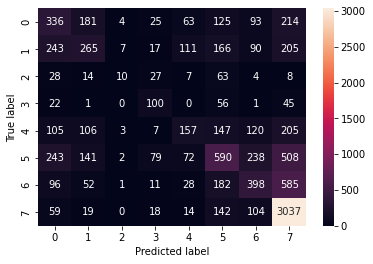

In [35]:
import seaborn as sns

hmap = sns.heatmap(df_cm, annot=True, fmt="d")
hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels())
hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels())
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [37]:
y_test.value_counts()

7    3393
5    1873
6    1353
1    1104
0    1041
4     850
3     225
2     161
Name: Criticality_level, dtype: int64

In [41]:
from collections import Counter

Counter(y_pred)

Counter({0: 1132, 1: 779, 2: 27, 3: 284, 4: 452, 5: 1471, 6: 1048, 7: 4807})

In [45]:
y_test_list = list(y_test)
len(y_test_list)

10000

In [46]:
y_pred_list = list(y_pred)
len(y_pred_list)

10000

In [52]:
for ele in range(0,8):
    match = [i for i, j in zip(y_test_list, y_pred_list) if i == j and i==ele]
    print(len(match))

336
265
10
100
157
590
398
3037


In [55]:
y_test_counts = [1041, 1104, 161, 225, 850, 1873, 1353, 3393]
correct_pred = [336, 265, 10, 100, 157, 590, 398, 3037]

df_final = pd.DataFrame(zip(y_test_counts, correct_pred), columns=['y_test_counts', 'correct_pred'])
df_final

,y_test_counts,correct_pred
0,1041,336
1,1104,265
2,161,10
3,225,100
4,850,157
5,1873,590
6,1353,398
7,3393,3037


In [56]:
df_final['percent'] = (df_final['correct_pred']/df_final['y_test_counts'])*100
df_final

,y_test_counts,correct_pred,percent
0,1041,336,32.276657
1,1104,265,24.003623
2,161,10,6.211180
3,225,100,44.444444
4,850,157,18.470588
5,1873,590,31.500267
6,1353,398,29.416112
7,3393,3037,89.507810


**What is the F1 score for the criticality level 5 (based on validation data)?**

From classification report, F1 score of level 5 is 0.24.

Note- level 5 is index 4.

**Based on your model which criticality level is difficult to predict (based on validation data)?**

From percent evaluation, level 3 (index 2) is hard to predict.

## PCA

In [57]:
from sklearn.decomposition import PCA

principal = PCA(n_components = 5)
principal.fit(X_train_norm)

X_train_pca = principal.transform(X_train_norm)
X_train_pca.shape

(49381, 5)

In [58]:
X_train_pca[:3]

array([[-1.17419348, -0.3731082 , -0.29881793, -0.14059303, -0.39394877],
       [-1.16533842, -0.13183565,  0.86001625,  0.38532599,  0.28314717],
       [ 0.20570488, -0.95721471, -0.34987386, -0.57303401,  0.23121622]])

In [59]:
principal.fit(X_test_norm)

X_test_pca = principal.transform(X_test_norm)
X_test_pca.shape

(10000, 5)

## PCA + Model Building

In [60]:
model = Sequential([
    layers.Dense(64, input_shape=[5]),
    layers.Dense(128),
    layers.Dense(num_classes, activation='softmax')
])

In [61]:
optimizer   = tf.keras.optimizers.RMSprop(learning_rate=1e-4)
loss        = tf.keras.losses.SparseCategoricalCrossentropy()
metrics     = ['accuracy']

In [62]:
model.compile(optimizer=optimizer,
              loss=loss,
              metrics=metrics)

In [63]:
epochs = 300

In [64]:
history = model.fit(X_train_pca,
                    y_train,
                    epochs = epochs,
                    verbose = 1,
                    batch_size=100,
                    validation_data = (X_test_pca, y_test))

Epoch 1/300
494/494 [==============================] - 2s 2ms/step - loss: 1.8026 - accuracy: 0.3693 - val_loss: 1.6773 - val_accuracy: 0.4064
Epoch 2/300
494/494 [==============================] - 1s 2ms/step - loss: 1.6708 - accuracy: 0.3971 - val_loss: 1.6357 - val_accuracy: 0.4107
Epoch 3/300
494/494 [==============================] - 1s 2ms/step - loss: 1.6540 - accuracy: 0.3971 - val_loss: 1.6303 - val_accuracy: 0.4108
Epoch 4/300
494/494 [==============================] - 1s 2ms/step - loss: 1.6521 - accuracy: 0.3974 - val_loss: 1.6311 - val_accuracy: 0.4127
Epoch 5/300
494/494 [==============================] - 1s 2ms/step - loss: 1.6518 - accuracy: 0.3971 - val_loss: 1.6308 - val_accuracy: 0.4084
Epoch 6/300
494/494 [==============================] - 1s 2ms/step - loss: 1.6517 - accuracy: 0.3971 - val_loss: 1.6320 - val_accuracy: 0.4091
Epoch 7/300
494/494 [==============================] - 1s 2ms/step - loss: 1.6517 - accuracy: 0.3981 - val_loss: 1.6302 - val_accuracy: 0.4101

<Figure size 432x288 with 0 Axes>

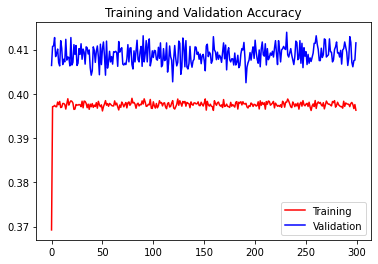

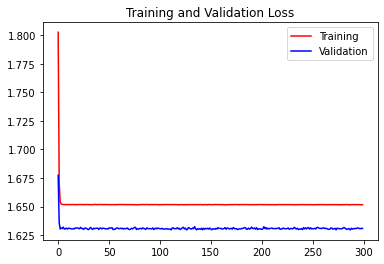

<Figure size 432x288 with 0 Axes>

In [65]:
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']

epochs   = range(len(acc))

plt.plot(epochs, acc, 'r', label = 'Training')
plt.plot(epochs, val_acc, 'b', label = 'Validation')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(loss))

plt.plot(epochs, loss, 'r', label = 'Training')
plt.plot(epochs, val_loss, 'b', label = 'Validation')
plt.title('Training and Validation Loss')
plt.legend()
plt.figure()